In [1]:
import numpy
from landlab import RasterModelGrid
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
mg = RasterModelGrid((80, 120), 2.0)

In [3]:
z = mg.add_zeros('node', 'topographic__elevation')

(0, 160)

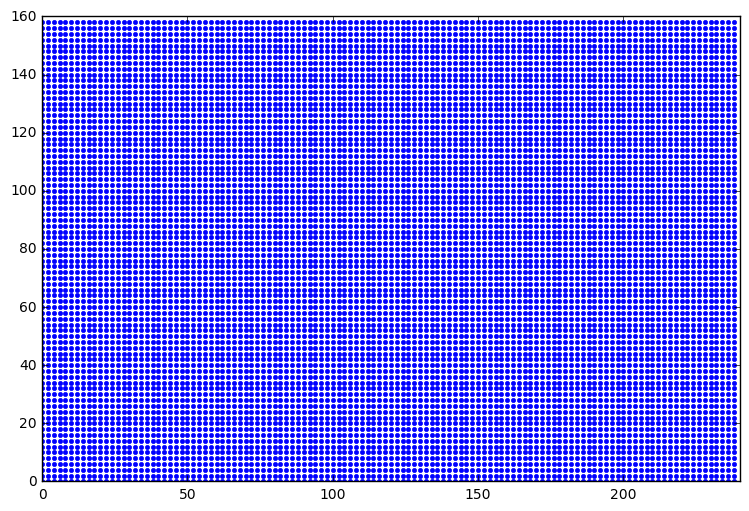

In [4]:
figure(figsize=(9,6))
plot(mg.x_of_node, mg.y_of_node, '.')
xlim(0,240)
ylim(0,160)

In [5]:
len(z)

9600

In [7]:
z += 10.0 + 0.01*mg.x_of_node + 2.5*(mg.y_of_node//80) + 0.02*(mg.y_of_node-(mg.y_of_node//80)*80)
z

array([ 20.  ,  20.04,  20.08, ...,  32.8 ,  32.84,  32.88])

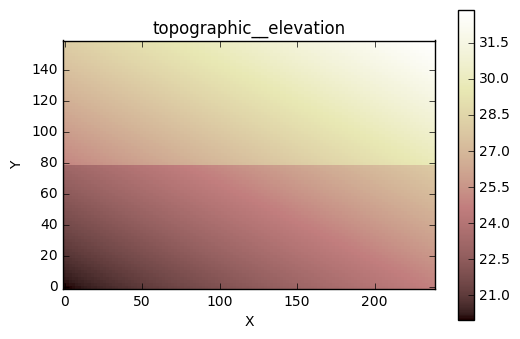

In [8]:
from landlab.plot.imshow import imshow_grid_at_node
imshow_grid_at_node(mg, 'topographic__elevation')

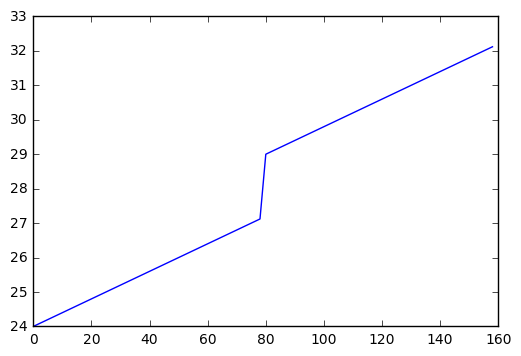

In [9]:
nodes = numpy.where(mg.x_of_node == 200)

desarrollorelieve = []
desarrollorelieve.append(z[nodes])
plt.plot(mg.y_of_node[nodes],z[nodes])

In [10]:
D = 0.01  # m2/yr transport coefficient
dt = 0.2 * mg.dx * mg.dx / D
dt

80.0

In [11]:
mg.set_closed_boundaries_at_grid_edges(True, False, True, False)

In [12]:
len(mg.core_nodes)

9204

In [13]:
qs = mg.add_zeros('link', 'sediment_flux')
for i in range(50):
    g = mg.calc_grad_at_link(z)
    qs[mg.active_links] = -D * g[mg.active_links]
    dqsdx = mg.calc_flux_div_at_node(qs)
    dzdt = -dqsdx
    z[mg.core_nodes] += dzdt[mg.core_nodes] * dt
    
    nodes = numpy.where(mg.x_of_node == 200)
    desarrollorelieve.append(z[nodes])

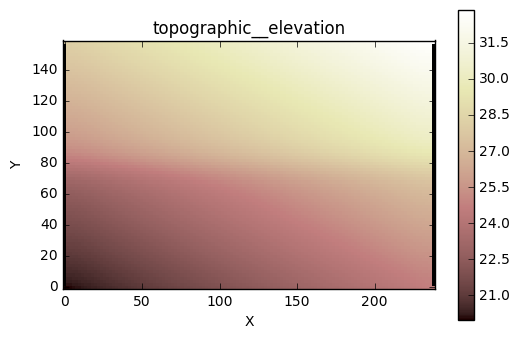

In [14]:
imshow_grid_at_node(mg, 'topographic__elevation')

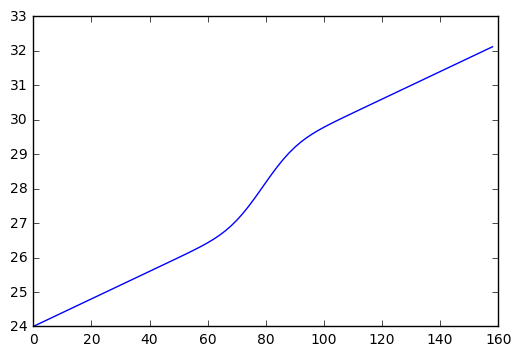

In [15]:
nodes = numpy.where(mg.x_of_node == 200)
plt.plot(mg.y_of_node[nodes],z[nodes])

<function __main__.representarsuperficie>

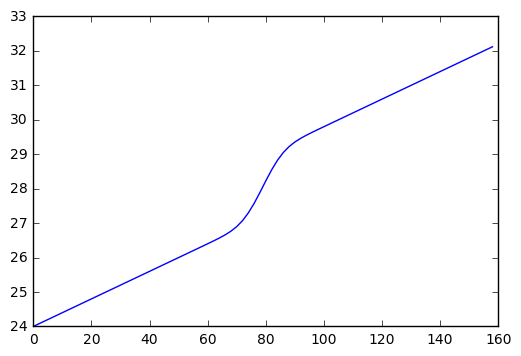

In [16]:
from ipywidgets.widgets import *

def representarsuperficie(n):
    nodes = numpy.where(mg.x_of_node == 200)
    plt.plot(mg.y_of_node[nodes],desarrollorelieve[n])
 

#representarsuperficie(1)
interact(representarsuperficie,n=(0,49,5))